In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print("This is as of " + str(datetime.now()))

This is as of 2017-08-07 20:25:30.062688


In [2]:
# Get the latest data from the Chicago data portal right now
%run "Get beach_days from API.ipynb"
beach_days.head()

Deleting columns: 
There are 20 beaches


,dna_reading_mean,dna_test_id,location,date,beach_name,predicted_level
0,44.698993,4836,"{'type': 'Point', 'coordinates': [-87.5299, 41...",2017-08-07,Calumet,NaN
1,945.461792,4837,"{'type': 'Point', 'coordinates': [-87.5636, 41...",2017-08-07,South Shore,NaN
2,192.686274,4844,"{'type': 'Point', 'coordinates': [-87.6663, 42...",2017-08-07,Howard,NaN
3,176.414285,4841,"{'type': 'Point', 'coordinates': [-87.6385, 41...",2017-08-07,Montrose,NaN
4,212.915476,4839,"{'type': 'Point', 'coordinates': [-87.6152, 41...",2017-08-07,Ohio Street,NaN


In [3]:
# How many days of samples were taken
print("Samples were taken across %s days" % len(beach_days['date'].unique()))

Samples were taken across 74 days


In [4]:
print("There are %s total beach-days, and %s unique predictions" %
     (str(len(beach_days)), str(len(beach_days.loc[~beach_days['predicted_level'].isnull()]))))

There are 1463 total beach-days, and 955 unique predictions


In [6]:
beach_days['elevated'] = beach_days['dna_reading_mean'] >= 1000
beach_days['predicted_elevated'] = beach_days['predicted_level'] >=250

beach_days.head(10)

,dna_reading_mean,dna_test_id,location,date,beach_name,predicted_level,elevated,predicted_elevated
0,44.698993,4836,"{'type': 'Point', 'coordinates': [-87.5299, 41...",2017-08-07,Calumet,NaN,False,False
1,945.461792,4837,"{'type': 'Point', 'coordinates': [-87.5636, 41...",2017-08-07,South Shore,NaN,False,False
2,192.686274,4844,"{'type': 'Point', 'coordinates': [-87.6663, 42...",2017-08-07,Howard,NaN,False,False
3,176.414285,4841,"{'type': 'Point', 'coordinates': [-87.6385, 41...",2017-08-07,Montrose,NaN,False,False
4,212.915476,4839,"{'type': 'Point', 'coordinates': [-87.6152, 41...",2017-08-07,Ohio Street,NaN,False,False
5,73.525506,4867,"{'type': 'Point', 'coordinates': [-87.6072, 41...",2017-08-07,Margaret T Burroughs (31st),NaN,False,False
6,154.987096,4871,"{'type': 'Point', 'coordinates': [-87.6515, 41...",2017-08-07,Foster,NaN,False,False
7,10.246951,4868,"{'type': 'Point', 'coordinates': [-87.6083, 41...",2017-08-07,12th Street,NaN,False,False
8,14186.839394,4840,"{'type': 'Point', 'coordinates': [-87.703717, ...",2017-08-07,Humboldt,NaN,True,False
9,233.846103,4872,"{'type': 'Point', 'coordinates': [-87.6564, 42...",2017-08-07,Hartigan (Albion),NaN,False,False


In [9]:
predicted_days = beach_days.loc[~beach_days['predicted_level'].isnull()]
len(predicted_days)

955

In [10]:
measured_days = beach_days.loc[~beach_days['dna_reading_mean'].isnull()]
len(measured_days)

1463

In [33]:
days_with_both = predicted_days.loc[~predicted_days['dna_reading_mean'].isnull()]
len(days_with_both)

955

In [34]:
# Days that were elevated, and were correctly predicted so
days_predicted_correctly = days_with_both.loc[(days_with_both['predicted_elevated']) & (days_with_both['elevated'])]
len(days_predicted_correctly)

21

In [35]:
# Days that were elevated, but were not predicted elevated
days_predicted_correctly = days_with_both.loc[(days_with_both['predicted_elevated'] == 0) & (days_with_both['elevated'])]
len(days_predicted_correctly)

40

In [36]:
# Days that were not elevated, but predicted so
days_predicted_correctly = days_with_both.loc[(days_with_both['predicted_elevated']) & (0 == days_with_both['elevated'])]
len(days_predicted_correctly)

107

In [38]:
# Days that were not elevated and predicted not elevated
days_predicted_correctly = days_with_both.loc[(0 == days_with_both['predicted_elevated']) & (0 == days_with_both['elevated'])]
len(days_predicted_correctly)

787

In [49]:
a = pd.DataFrame()
a.append(
    ['TP (elevated, predicted elevated)',
         len(days_with_both.loc[(days_with_both['predicted_elevated']) & (days_with_both['elevated'])])),
         ('TN (elevated, but predicted not)',
         len(days_with_both.loc[(days_with_both['predicted_elevated'] == 0) & (days_with_both['elevated'])])),
         ('FP (not elevated, but predicted so)',
         len(days_with_both.loc[(days_with_both['predicted_elevated']) & (0 == days_with_both['elevated'])])),
         ('FN (not elevated, not predicted so)',
         len(days_with_both.loc[(0 == days_with_both['predicted_elevated']) & (0 == days_with_both['elevated'])]))
    ]
)
a.head()

""


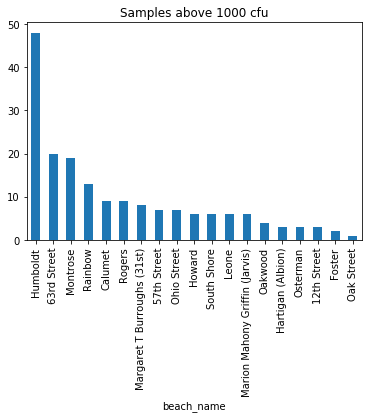

In [37]:
# For the DNA testing, the threshold for an advisory is 1000 CFU.  How many beaches exceed that?
beach_days.loc[beach_days['dna_reading_mean'] >= 1000].groupby('beach_name').count()['date']\
    .sort_values(ascending=False).plot(kind="bar", title="Samples above 1000 cfu")

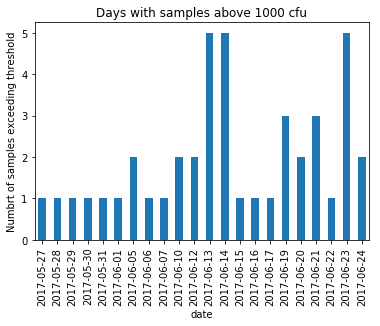

In [7]:
beach_days.loc[beach_days['dna_reading_mean'] >= 1000].groupby('date').count()['location']\
    .plot(kind="bar", title="Days with samples above 1000 cfu").set_ylabel("Numbrt of samples exceeding threshold")

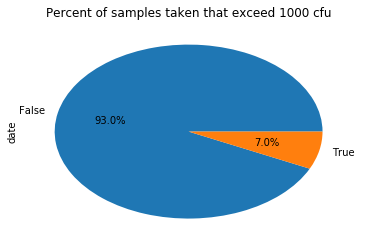

In [8]:
# Samples that exceed threshold
beach_days['dna_exceeds'] = beach_days['dna_reading_mean'] > 1000
beach_days.groupby('dna_exceeds').count()['date'].plot(kind="pie", title="Percent of samples taken that exceed 1000 cfu", autopct='%1.1f%%')

In [9]:
# What have been the highest readings so far?
beach_days.sort_values('dna_reading_mean', ascending=False)[['beach_name', 'date', 'dna_reading_mean']].head(20)

,beach_name,date,dna_reading_mean
250,63rd Street,2017-06-13,9386.074046
47,Humboldt,2017-06-23,7451.962963
120,Ohio Street,2017-06-19,6264.337954
209,Humboldt,2017-06-15,6083.474829
550,Humboldt,2017-05-29,5669.991182
43,63rd Street,2017-06-23,5393.683435
536,Humboldt,2017-05-30,4565.198791
109,63rd Street,2017-06-20,3794.843080
243,Montrose,2017-06-13,3619.694186
397,Montrose,2017-06-05,3223.844289
